In [50]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('./matplotlibrc')

In [51]:
def addAx(axarr, i, cols, data, title='', title2=''):
    axarr[i].set_title(title)
    axarr[i].set_ylabel(title2)
    s0s = list(map(lambda smin: sminMap[smin], data.index))
    for col in cols:
        axarr[i].errorbar(s0s, data[col], yerr=data[col+'Err'], barsabove=True, fmt='.', marker='o')
    axarr[i].legend(cols)


def read_csv(path, exclude=[]):
    df = pd.read_csv(path, header=1)
    df.index = list(sminMap.keys())[:len(df)]
    if len(exclude) != 0:
        df.drop(exclude, inplace=True)
    return df



# Load Data

In [52]:
sminMap = {
    'smin15': 23, 'smin1525': 22, 'smin155': 21, 'smin1575': 20, 'smin16': 19,
    'smin1625': 18, 'smin165': 17, 'smin1675': 16, 'smin17': 15, 'smin175': 14,
    'smin18': 13, 'smin185': 12, 'smin19': 11, 'smin195': 10, 'smin20': 9,
    'smin21': 8, 'smin22': 7, 'smin23': 6, 'smin24': 5, 'smin26': 4, 'smin28': 3
}
columns=[
    'status', 'alpha', 'alphaErr', 'aGGInv', 'aGGInvErr', 'c6', 'c6Err',
    'c8', 'c8Err', 'c10', 'c10Err', 'c12', 'c12Err', 'chi', 'dof',
    'chiDof', 'edm', 'del0', 'del4', 'del6', 'del8', 'del10', 'del12'
]

kinD6D8 = read_csv('../../FESR/configurations/2019/wKinematicD6D8/fits.csv')
kinD6D8D10 = read_csv('../../FESR/configurations/2019/wKinematicD6D8D10/fits.csv')
kinD6D8D10D12 = read_csv('../../FESR/configurations/2019/wKinematicD6D8D10D12/fits.csv')
kinAlD6D8 = read_csv('../../FESR/configurations/2019/wKinematicAlphaD6D8/fits.csv')
kinAlD6D8D10 = read_csv('../../FESR/configurations/2019/wKinematicAlphaD6D8D10/fits.csv')
kinAlD6D8D10D12 = read_csv('../../FESR/configurations/2019/wKinematicAlphaD6D8D10D12/fits.csv')


## Plots with free Alpha

In [ ]:
fig, (axes) = plt.subplots(2, 3, sharex=True)
plt.xticks(list(sminMap.values()), fontsize=22)
addAx(axes[0], 0, ['alpha'], kinAlD6D8, 'free D6 and D8', 'alpha')
addAx(axes[0], 1, ['alpha'], kinAlD6D8D10, 'free D6, D8, and D10')
addAx(axes[0], 2, ['alpha'], kinAlD6D8D10D12, 'free D6, D8, D10 and D12')

addAx(axes[1], 0, ['c6', 'c8'], kinAlD6D8, title2='D6, D8')
addAx(axes[1], 1, ['c6', 'c8'], kinAlD6D8D10)
addAx(axes[1], 2, ['c6', 'c8'], kinAlD6D8D10D12)

fig.tight_layout()

plt.show()

## Plots with fixed Alpha

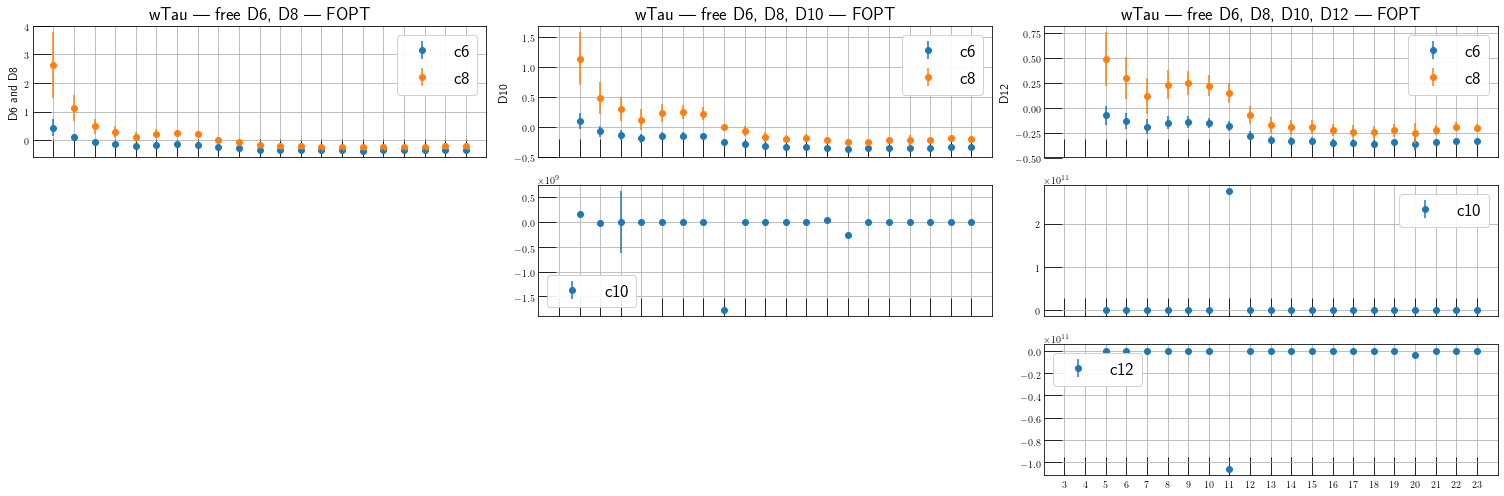

In [23]:
fig, (axes) = plt.subplots(3, 3, sharex=True)
plt.xticks(list(sminMap.values()))
# fig.suptitle('Kinematic weight with different settings of D6, D8 and Alpha for different s0s in FOPT')

addAx(axes[0], 0, ['c6', 'c8'], kinD6D8, 'wTau | free D6, D8 | FOPT', 'D6 and D8' )
addAx(axes[0], 1, ['c6', 'c8'], kinD6D8D10, 'wTau | free D6, D8, D10 | FOPT', 'D10')
addAx(axes[0], 2, ['c6', 'c8'], kinD6D8D10D12, 'wTau | free D6, D8, D10, D12 | FOPT', 'D12')


axes[1, 0].axis('off')
addAx(axes[1], 1, ['c10'], kinD6D8D10)
addAx(axes[1], 2, ['c10'], kinD6D8D10D12)


axes[2, 0].axis('off')
axes[2, 1].axis('off')
addAx(axes[2], 2, ['c12'], kinD6D8D10D12)

fig.tight_layout()
plt.show()

In [32]:
kkkkkkkkkkkkkkjkinD6D8D10

          status   alpha  alphaErr  aGGInv  aGGInvErr        c6     c6Err  \
smin15         0  0.3179         0   0.021          0 -0.338055  0.024955   
smin1525       3  0.3179         0   0.021          0 -0.329555  0.027724   
smin155        0  0.3179         0   0.021          0 -0.346891  0.023961   
smin1575       0  0.3179         0   0.021          0 -0.349195  0.061965   
smin16         3  0.3179         0   0.021          0 -0.348553  0.033441   
smin1625       3  0.3179         0   0.021          0 -0.360394  0.004996   
smin165        3  0.3179         0   0.021          0 -0.362990  0.032822   
smin1675       3  0.3179         0   0.021          0 -0.350376  0.036004   
smin17         0  0.3179         0   0.021          0 -0.333023  0.039495   
smin175        0  0.3179         0   0.021          0 -0.336255  0.039650   
smin18         0  0.3179         0   0.021          0 -0.324246  0.042942   
smin185        0  0.3179         0   0.021          0 -0.278703  0.046730   

# Kinematic Weight (1-x)^2(1+2x)

## Fit: D6, D8

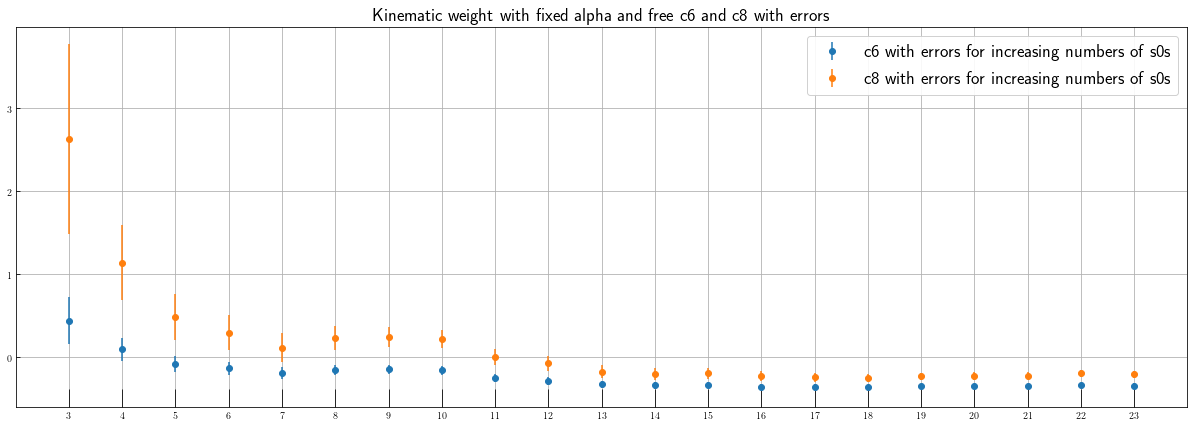

(PCC, p-value): (0.986842333491917, 1.6857835149094689e-16)


In [3]:
data = np.genfromtxt('../../FESR/configurations/2019/wKinematicD6D8/fits.csv', delimiter=',', skip_header=2)
df = pd.DataFrame(
    data,
    index=[
        'smin15', 'smin1525', 'smin155', 'smin1575', 'smin16', 'smin1625',
        'smin165', 'smin1675', 'smin17', 'smin175', 'smin18', 'smin185', 'smin19',
        'smin195', 'smin20', 'smin21', 'smin22', 'smin23', 'smin24', 'smin26', 'smin28'
    ],
    columns=[
        'status', 'alpha', 'alphaErr', 'aGGInv', 'aGGInvErr', 'c6', 'c6Err',
        'c8', 'c8Err', 'c10', 'c10Err', 'c12', 'c12Err', 'chi', 'dof',
        'chiDof', 'edm', 'del0', 'del4', 'del6', 'del8', 'del10', 'del12'
    ]
)
#print('Table:')
#print(df[['c6', 'c6Err', 'c8', 'c8Err', 'chiDof']])
c6s = data[:,5]
c6Errs = data[:,6]
c8s = data[:,7]
c8Errs = data[:,8]
s0s = list(range(23, 2, -1))
plt.errorbar(s0s, c6s, yerr=c6Errs, barsabove=True, fmt='.', marker='o')
plt.errorbar(s0s, c8s, yerr=c8Errs, barsabove=True, fmt='.', marker='o')
plt.title('Kinematic weight with fixed alpha and free c6 and c8 with errors')
plt.legend(['c6 with errors for increasing numbers of s0s', 'c8 with errors for increasing numbers of s0s'])
plt.xticks(s0s)
#plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
print('(PCC, p-value):', stats.pearsonr(c6s, c8s))
bestWKinematicD6D8Row = data[5,:]

### Facts
- D6 and D8 are strongly correlated (PCC of 0.9).
- They converge with increasing s0s close to zero with a slightly negative value.
- Their values get closer with increasing s0s.
- Their errors decrease (vanish) with increasing s0s number.
- It has a sinusial behavior with exponential decreasing amplitude
  (like the DV-model) for an increasing number of s0s.

## Fit: D6, D8, Alpha

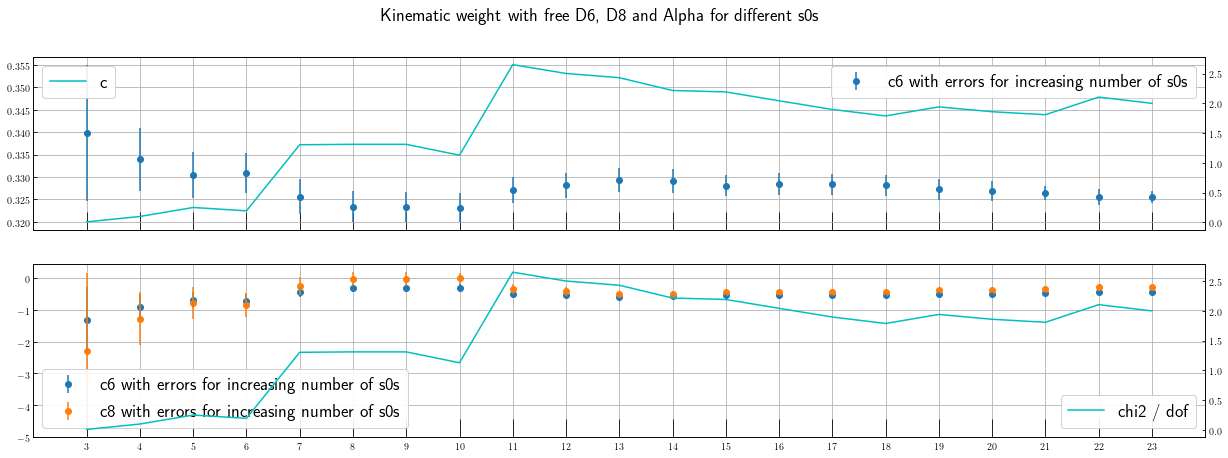

In [37]:
data = np.genfromtxt('../../FESR/configurations/2019/wKinematicAlphaD6D8/fits.csv', delimiter=',', skip_header=2)
df = pd.DataFrame(
    data,
    index=[
        'smin15', 'smin1525', 'smin155', 'smin1575', 'smin16', 'smin1625',
        'smin165', 'smin1675', 'smin17', 'smin175', 'smin18', 'smin185', 'smin19',
        'smin195', 'smin20', 'smin21', 'smin22', 'smin23', 'smin24', 'smin26', 'smin28'
    ],
    columns=[
        'status', 'alpha', 'alphaErr', 'aGGInv', 'aGGInvErr', 'c6', 'c6Err',
        'c8', 'c8Err', 'c10', 'c10Err', 'c12', 'c12Err', 'chi', 'dof',
        'chiDof', 'edm', 'del0', 'del4', 'del6', 'del8', 'del10', 'del12'
    ]
)
# print('Table:')
# print(df[['alpha', 'alphaErr', 'c6', 'c6Err', 'c8', 'c8Err', 'chiDof']])
chi2Dofs = data[:,15]
alphas = data[:,1]
alphaErrs = data[:,2]
c6s = data[:,5]
c6Errs = data[:,6]
c8s = data[:,7]
c8Errs = data[:,8]
s0s = list(range(23, 2, -1))

fig, axarr = plt.subplots(2, sharex=True)
plt.xticks(s0s)
fig.suptitle('Kinematic weight with free D6, D8 and Alpha for different s0s')
axarr[0].errorbar(s0s, alphas, yerr=alphaErrs, barsabove=True, fmt='.', marker='o')
axarr[0].legend(['c6 with errors for increasing number of s0s', 'c8 with errors for increasing number of s0s'], loc=1)

ax2 = axarr[0].twinx()
ax2.plot(s0s, chi2Dofs, color='c')
ax2.legend('chisquare / dof', loc=2)
ax2.grid(None)

plt.xticks(s0s)
axarr[1].errorbar(s0s, c6s, yerr=c6Errs, barsabove=True, fmt='.', marker='o')
axarr[1].errorbar(s0s, c8s, yerr=c8Errs, barsabove=True, fmt='.', marker='o')
axarr[1].legend(['c6 with errors for increasing number of s0s', 'c8 with errors for increasing number of s0s'], loc=3)

ax3 = axarr[1].twinx()
ax3.plot(s0s, chi2Dofs, color='c')
ax3.legend(['chi2 / dof'], loc=4)
ax3.grid(None)

plt.show()
bestWKinematicD6D8AlphaRow = data[1,:]

value for the first two moments (4 and 5 s0s), but gets
to low with increasing s0s number. Alpha_s and its is decreasing with the
number of used s0s. Alpha_s has a stabel value around 0.33. c6 and c8 are
negative and aproaching 0 with increasing moments.

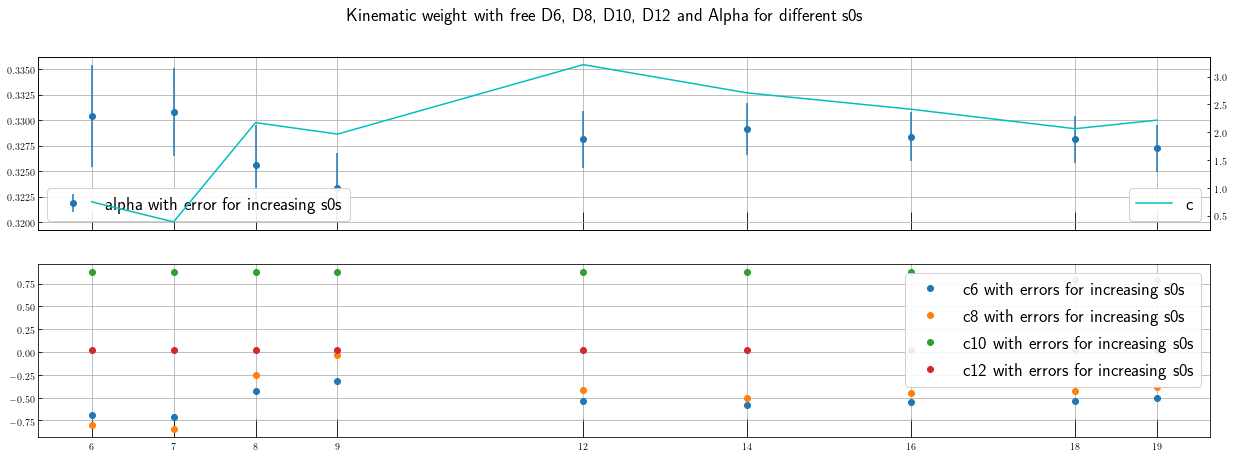

In [10]:
data = np.genfromtxt('../../FESR/configurations/2019/wKinematicAlphaD6D8D10D12/fits.csv', delimiter=',', skip_header=2)
df = pd.DataFrame(
    data,
    index=[
        'smin15', 'smin1525', 'smin155', 'smin1575', 'smin16', 'smin1625',
        'smin165', 'smin1675', 'smin17', 'smin175', 'smin18', 'smin185', 'smin19',
        'smin195', 'smin20', 'smin21', 'smin22', 'smin23'
    ],
    columns=[
        'status', 'alpha', 'alphaErr', 'aGGInv', 'aGGInvErr', 'c6', 'c6Err',
        'c8', 'c8Err', 'c10', 'c10Err', 'c12', 'c12Err', 'chi', 'dof',
        'chiDof', 'edm', 'del0', 'del4', 'del6', 'del8', 'del10', 'del12'
    ]
)
# exclude non converged rows

# exlcude 15th and 17th row ( c12 has too big error)
df.drop(['smin17', 'smin165', 'smin195'], inplace=True)
is_converged = df['status']==0
data = df[is_converged]
# print('Table:')
# print(df[['alpha', 'alphaErr', 'c6', 'c6Err', 'c8', 'c8Err', 'chiDof']])
s0s = list(map(lambda smin: sminMap[smin], data.index))

fig, ax_arr = plt.subplots(2, sharex=True)
plt.xticks(s0s)
plt.suptitle('Kinematic weight with free D6, D8, D10, D12 and Alpha for different s0s')
ax_arr[0].errorbar(s0s, data['alpha'], yerr=data['alphaErr'], barsabove=True, fmt='.', marker='o')
ax_arr[0].legend(['alpha with error for increasing s0s'], loc=3)

ax2 = ax_arr[0].twinx()
ax2.plot(s0s, data['chiDof'], color='c')
ax2.legend('chisquare / dof', loc=4)
ax2.grid(None)

ax_arr[1].errorbar(s0s, data['c6'],  barsabove=True, fmt='.', marker='o')
ax_arr[1].errorbar(s0s, data['c8'], barsabove=True, fmt='.', marker='o')
ax_arr[1].errorbar(s0s, data['c10'], barsabove=True, fmt='.', marker='o')
ax_arr[1].errorbar(s0s, data['c12'], barsabove=True, fmt='.', marker='o')
ax_arr[1].legend([
    'c6 with errors for increasing s0s', 'c8 with errors for increasing s0s',
    'c10 with errors for increasing s0s', 'c12 with errors for increasing s0e'
], loc=1)


plt.show()

Errors are removed because are all of equally size.

In [5]:
bestWKinematicRows = np.array([bestWKinematicD6D8Row, bestWKinematicD6D8AlphaRow])
%store bestWKinematicRows

Stored 'bestWKinematicRows' (ndarray)


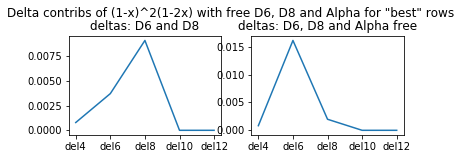

In [10]:
plt.suptitle('Delta contribs of (1-x)^2(1-2x) with free D6, D8 and Alpha for "best" rows')
deltasD6D8 = np.array([abs(x) for x in bestWKinematicRows[0,18:]])
deltasD6D8Alpha = np.array([abs(x) for x in bestWKinematicRows[1,18:]])
deltaVec = ['del4', 'del6', 'del8', 'del10', 'del12']
plt.subplot(2, 2, 1)
plt.title('deltas: D6 and D8')
plt.plot(deltaVec, deltasD6D8)
plt.subplot(2, 2, 2)
plt.title('deltas: D6, D8 and Alpha free')
plt.plot(deltaVec, deltasD6D8Alpha)
plt.show()